# Analysis from ENEM microdata for 2020

## Import libs

In [1]:
import pandas as pd
from apyori import apriori

## Read microdata file

In [2]:
data = pd.read_csv('../microdata/microdata-enem-2020.csv', sep=';', encoding='ISO-8859-1')
data

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783104,200003396891,2020,2,F,1,1,1,2,0,2,...,B,A,A,B,A,A,D,A,B,B
5783105,200006040822,2020,3,M,1,1,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5783106,200004928656,2020,3,F,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5783107,200006774808,2020,4,F,1,1,1,2,0,3,...,B,B,B,D,B,B,E,A,D,B


## Select only columns of interest

In [3]:
interest_columns = [
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_FAIXA_ETARIA',
    'TP_ST_CONCLUSAO',
    'TP_ESCOLA',
    'TP_DEPENDENCIA_ADM_ESC',
    'SG_UF_PROVA',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q006',
    'Q022',
    'Q024',
    'Q025'
]

interest_data = data[interest_columns]

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025
0,F,1,2,11,1,1,NaN,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M,2,3,11,1,1,NaN,RN,604.1,661.7,595.3,711.3,580.0,NaN,NaN,NaN,NaN,NaN,NaN
2,F,2,3,4,2,2,2.0,BA,NaN,NaN,NaN,NaN,NaN,B,C,B,A,A,A
3,M,1,3,2,2,2,3.0,SP,620.8,675.0,624.2,759.4,760.0,NaN,NaN,NaN,NaN,NaN,NaN
4,F,1,3,4,1,1,NaN,MG,NaN,NaN,NaN,NaN,NaN,B,G,B,B,A,B


### Check count for valid values

In [4]:
interest_data.count()

TP_SEXO                   5783109
TP_ESTADO_CIVIL           5783109
TP_COR_RACA               5783109
TP_FAIXA_ETARIA           5783109
TP_ST_CONCLUSAO           5783109
TP_ESCOLA                 5783109
TP_DEPENDENCIA_ADM_ESC     904569
SG_UF_PROVA               5783109
NU_NOTA_CN                2597440
NU_NOTA_CH                2754140
NU_NOTA_LC                2754140
NU_NOTA_MT                2597440
NU_NOTA_REDACAO           2754140
Q001                      5687143
Q002                      5687143
Q006                      5687143
Q022                      5687143
Q024                      5687143
Q025                      5687143
dtype: int64

## Translate some columns to better readability

In [5]:
%run '../scripts/attribute-dictionary.py'

interest_data = interest_data.fillna(value = {"TP_DEPENDENCIA_ADM_ESC": 0})
interest_data = interest_data.replace(dictionary_params)

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025
0,Feminino,Solteiro(a),Preto,Entre 26 e 30 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Norte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Masculino,Casado(a) ou mora com companheiro(a),Pardo,Entre 26 e 30 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,604.1,661.7,595.3,711.3,580.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Feminino,Casado(a) ou mora com companheiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Estadual,Região Nordeste,NaN,NaN,NaN,NaN,NaN,Pai Fundamental I incompleto,Mãe Fundamental II incompleto,Classe Social E,Não tem celular,Não tem computador,Não tem internet em casa
3,Masculino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Municipal,Região Sudeste,620.8,675.0,624.2,759.4,760.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,NaN,NaN,NaN,NaN,NaN,Pai Fundamental I incompleto,Mãe Pós-graduação completa,Classe Social E,Tem celular,Não tem computador,Tem internet em casa


## Remove nil values and creates a new column with the arithmetic average of the grades

In [6]:
interest_data = interest_data.query("NU_NOTA_CN.notnull() and NU_NOTA_CH.notnull() and NU_NOTA_LC.notnull() and NU_NOTA_MT.notnull() and NU_NOTA_REDACAO.notnull() and TP_ESTADO_CIVIL.notnull() and Q006.notnull() and Q022.notnull() and Q024.notnull() and Q025.notnull()")
interest_data["NU_NOTA_GERAL"] = interest_data[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025,NU_NOTA_GERAL
5,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sul,498.1,604.7,505.4,526.7,700.0,Pai Fundamental II incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,566.98
8,Feminino,Casado(a) ou mora com companheiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,439.7,383.5,486.2,448.5,600.0,Pai Fundamental I incompleto,Mãe Fundamental II incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa,471.58
11,Masculino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,491.1,631.4,627.9,546.5,640.0,Pai Fundamental I incompleto,Mãe Fundamental II incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,587.38
18,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,422.4,488.1,559.1,420.3,800.0,Pai Fundamental II incompleto,Mãe Fundamental II incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,537.98
19,Masculino,Solteiro(a),Preto,Entre 36 e 40 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Norte,486.0,503.3,439.8,405.6,500.0,Pai Fundamental II incompleto,Mãe Ensino médio incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa,466.94


### Check count for valid values

In [7]:
interest_data.count()

TP_SEXO                   2561304
TP_ESTADO_CIVIL           2561304
TP_COR_RACA               2561304
TP_FAIXA_ETARIA           2561304
TP_ST_CONCLUSAO           2561304
TP_ESCOLA                 2561304
TP_DEPENDENCIA_ADM_ESC    2561304
SG_UF_PROVA               2561304
NU_NOTA_CN                2561304
NU_NOTA_CH                2561304
NU_NOTA_LC                2561304
NU_NOTA_MT                2561304
NU_NOTA_REDACAO           2561304
Q001                      2561304
Q002                      2561304
Q006                      2561304
Q022                      2561304
Q024                      2561304
Q025                      2561304
NU_NOTA_GERAL             2561304
dtype: int64

## Calculate Z-SCORE from NU_NOTA_GERAL

In [8]:
from scipy.stats import zscore

interest_data["Z_SCORE_NOTA"] = zscore(interest_data["NU_NOTA_GERAL"])
interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,...,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025,NU_NOTA_GERAL,Z_SCORE_NOTA
5,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sul,498.1,604.7,...,526.7,700.0,Pai Fundamental II incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,566.98,0.441210
8,Feminino,Casado(a) ou mora com companheiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,439.7,383.5,...,448.5,600.0,Pai Fundamental I incompleto,Mãe Fundamental II incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa,471.58,-0.601147
11,Masculino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,491.1,631.4,...,546.5,640.0,Pai Fundamental I incompleto,Mãe Fundamental II incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,587.38,0.664104
18,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,422.4,488.1,...,420.3,800.0,Pai Fundamental II incompleto,Mãe Fundamental II incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,537.98,0.124351
19,Masculino,Solteiro(a),Preto,Entre 36 e 40 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Norte,486.0,503.3,...,405.6,500.0,Pai Fundamental II incompleto,Mãe Ensino médio incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa,466.94,-0.651844


### Z-SCORE mínimo

In [9]:
interest_data["Z_SCORE_NOTA"].min()

-5.753708555170386

### Z-SCORE máximo

In [10]:
interest_data["Z_SCORE_NOTA"].max()

3.627280109866742

## Create a label for grade based on z-score

In [11]:
NOTA_GERAL_LABELS = [
  "NOTA: MUITO ABAIXO DA MÉDIA",
  "NOTA: ABAIXO DA MÉDIA",
  "NOTA: MÉDIA",
  "NOTA: ACIMA DA MÉDIA",
  "NOTA: MUITO ACIMA DA MÉDIA",
]

interest_data["CLASSIFICACAO_NOTA"] = pd.cut(interest_data["Z_SCORE_NOTA"], bins=[-10, -2, -1, 1, 2, 10], labels=NOTA_GERAL_LABELS)

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025,NU_NOTA_GERAL,Z_SCORE_NOTA,CLASSIFICACAO_NOTA
5,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sul,498.1,604.7,...,700.0,Pai Fundamental II incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,566.98,0.441210,NOTA: MÉDIA
8,Feminino,Casado(a) ou mora com companheiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,439.7,383.5,...,600.0,Pai Fundamental I incompleto,Mãe Fundamental II incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa,471.58,-0.601147,NOTA: MÉDIA
11,Masculino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,491.1,631.4,...,640.0,Pai Fundamental I incompleto,Mãe Fundamental II incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,587.38,0.664104,NOTA: MÉDIA
18,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,422.4,488.1,...,800.0,Pai Fundamental II incompleto,Mãe Fundamental II incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,537.98,0.124351,NOTA: MÉDIA
19,Masculino,Solteiro(a),Preto,Entre 36 e 40 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Norte,486.0,503.3,...,500.0,Pai Fundamental II incompleto,Mãe Ensino médio incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa,466.94,-0.651844,NOTA: MÉDIA


## Check for uniqueness of all values to check if all of them was translated

In [12]:
interest_data['TP_SEXO'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [13]:
interest_data['TP_ESTADO_CIVIL'].unique()

array(['Solteiro(a)', 'Casado(a) ou mora com companheiro(a)',
       'Estado civil: Não informado',
       'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)'],
      dtype=object)

In [14]:
interest_data['TP_COR_RACA'].unique()

array(['Pardo', 'Branco', 'Preto', 'Cor/Raça Não Declarado', 'Amarelo',
       'Indígena'], dtype=object)

In [15]:
interest_data['TP_FAIXA_ETARIA'].unique()

array(['Entre 17 e 25 anos', 'Entre 36 e 40 anos', 'Entre 31 e 35 anos',
       'Entre 26 e 30 anos', 'Menor de 17 anos', 'Entre 46 e 50 anos',
       'Entre 41 e 45 anos', 'Entre 51 e 55 anos', 'Entre 56 e 60 anos',
       'Entre 66 e 70 anos', 'Entre 61 e 65 anos', 'Maior de 70 anos'],
      dtype=object)

In [16]:
interest_data['TP_ST_CONCLUSAO'].unique()

array(['Já concluí o Ensino Médio',
       'Estou cursando e concluirei o Ensino este ano',
       'Estou cursando e concluirei o Ensino Médio após este ano',
       'Não concluí e não estou cursando o Ensino Médio'], dtype=object)

In [17]:
interest_data['TP_ESCOLA'].unique()

array(['Não Respondeu', 'Pública', 'Privada'], dtype=object)

In [18]:
interest_data['TP_DEPENDENCIA_ADM_ESC'].unique()

array(['Dependencia administrativa nao informada', 'Estadual', 'Federal',
       'Privada', 'Municipal'], dtype=object)

In [19]:
interest_data['SG_UF_PROVA'].unique()

array(['Região Sul', 'Região Nordeste', 'Região Norte', 'Região Sudeste',
       'Região Centro-Oeste'], dtype=object)

In [20]:
interest_data['Q001'].unique()

array(['Pai Fundamental II incompleto', 'Pai Fundamental I incompleto',
       'Pai Ensino médio completo', 'Pai Ensino médio incompleto',
       'Não sei a escolaridade do meu pai', 'Pai nunca estudou',
       'Pai Graduação completa', 'Pai Pós-graduação completa'],
      dtype=object)

In [21]:
interest_data['Q002'].unique()

array(['Mãe Fundamental I incompleto', 'Mãe Fundamental II incompleto',
       'Mãe Ensino médio incompleto', 'Mãe Ensino médio completo',
       'Mãe nunca estudou', 'Mãe Graduação completa',
       'Não sei a escolaridade da minha mãe',
       'Mãe Pós-graduação completa'], dtype=object)

In [22]:
interest_data['Q006'].unique()

array(['Classe Social E', 'Classe Social D', 'Classe Social C',
       'Classe Social B', 'Classe Social A'], dtype=object)

In [23]:
interest_data['Q022'].unique()

array(['Tem celular', 'Não tem celular'], dtype=object)

In [24]:
interest_data['Q024'].unique()

array(['Tem computador', 'Não tem computador'], dtype=object)

In [25]:
interest_data['Q025'].unique()

array(['Tem internet em casa', 'Não tem internet em casa'], dtype=object)

In [26]:
interest_data['CLASSIFICACAO_NOTA'].unique()

['NOTA: MÉDIA', 'NOTA: MUITO ACIMA DA MÉDIA', 'NOTA: ABAIXO DA MÉDIA', 'NOTA: ACIMA DA MÉDIA', 'NOTA: MUITO ABAIXO DA MÉDIA']
Categories (5, object): ['NOTA: MUITO ABAIXO DA MÉDIA' < 'NOTA: ABAIXO DA MÉDIA' < 'NOTA: MÉDIA' < 'NOTA: ACIMA DA MÉDIA' < 'NOTA: MUITO ACIMA DA MÉDIA']

## Generate histograms by grade z-score

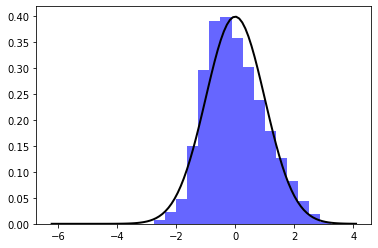

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

data = interest_data['Z_SCORE_NOTA'].to_numpy()

mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

## Filter by grades far above or far below average

In [28]:
filtered_interest_data = interest_data.query("Z_SCORE_NOTA > 2.00 or Z_SCORE_NOTA < -2.00")
filtered_interest_data.count()

TP_SEXO                   117225
TP_ESTADO_CIVIL           117225
TP_COR_RACA               117225
TP_FAIXA_ETARIA           117225
TP_ST_CONCLUSAO           117225
TP_ESCOLA                 117225
TP_DEPENDENCIA_ADM_ESC    117225
SG_UF_PROVA               117225
NU_NOTA_CN                117225
NU_NOTA_CH                117225
NU_NOTA_LC                117225
NU_NOTA_MT                117225
NU_NOTA_REDACAO           117225
Q001                      117225
Q002                      117225
Q006                      117225
Q022                      117225
Q024                      117225
Q025                      117225
NU_NOTA_GERAL             117225
Z_SCORE_NOTA              117225
CLASSIFICACAO_NOTA        117225
dtype: int64

In [29]:
analysis_interest_columns = [
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_FAIXA_ETARIA',
    'TP_ST_CONCLUSAO',
    'TP_ESCOLA',
    'TP_DEPENDENCIA_ADM_ESC',
    'SG_UF_PROVA',
    'CLASSIFICACAO_NOTA',
    'Q001',
    'Q002',
    'Q006',
    'Q022',
    'Q024',
    'Q025'
]

analysis_interest_data = filtered_interest_data[analysis_interest_columns]

## Save a CSV file with the analysis interest data

In [30]:
import os  

os.makedirs('analysis_interest_data', exist_ok=True)  
analysis_interest_data.to_csv('analysis_interest_data/analysis-interest-data-2020.csv')

analysis_file_data = pd.read_csv('analysis_interest_data/analysis-interest-data-2020.csv', sep=',', encoding='UTF-8')
analysis_file_data.head()

,Unnamed: 0,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,CLASSIFICACAO_NOTA,Q001,Q002,Q006,Q022,Q024,Q025
0,22,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Norte,NOTA: MUITO ACIMA DA MÉDIA,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Tem computador,Não tem internet em casa
1,47,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,NOTA: MUITO ACIMA DA MÉDIA,Pai Ensino médio completo,Mãe Fundamental II incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa
2,76,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,NOTA: MUITO ACIMA DA MÉDIA,Pai Ensino médio completo,Mãe Graduação completa,Classe Social E,Tem celular,Tem computador,Tem internet em casa
3,254,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Nordeste,NOTA: MUITO ACIMA DA MÉDIA,Pai Ensino médio completo,Mãe Graduação completa,Classe Social E,Tem celular,Não tem computador,Tem internet em casa
4,259,Masculino,Solteiro(a),Branco,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Sudeste,NOTA: MUITO ACIMA DA MÉDIA,Pai Fundamental II incompleto,Mãe Fundamental II incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa


## Convert table to transactions

In [31]:
transactions = analysis_interest_data.to_numpy()
transactions

array([['Feminino', 'Solteiro(a)', 'Pardo', ..., 'Tem celular',
        'Tem computador', 'Não tem internet em casa'],
       ['Feminino', 'Solteiro(a)', 'Pardo', ..., 'Tem celular',
        'Tem computador', 'Tem internet em casa'],
       ['Feminino', 'Solteiro(a)', 'Branco', ..., 'Tem celular',
        'Tem computador', 'Tem internet em casa'],
       ...,
       ['Feminino', 'Solteiro(a)', 'Pardo', ..., 'Não tem celular',
        'Não tem computador', 'Não tem internet em casa'],
       ['Feminino', 'Solteiro(a)', 'Preto', ..., 'Tem celular',
        'Não tem computador', 'Não tem internet em casa'],
       ['Masculino', 'Solteiro(a)', 'Branco', ..., 'Tem celular',
        'Tem computador', 'Tem internet em casa']], dtype=object)

## Create apriori rules

In [32]:
%run '../scripts/apriori-params-setup.py'
rules = apriori(transactions, min_support=support, min_confidence=confidence)
rules

<generator object apriori at 0x17639db30>

## Run apriori

In [33]:
from datetime import datetime

initial_time = datetime.now()

results = pd.DataFrame(list(rules))

execution_time = datetime.now() - initial_time
print("Time to run apriori: " + str(execution_time))

Time to run apriori: 0:40:38.815263


In [34]:
results

,items,support,ordered_statistics
0,(Branco),0.546249,"[((), (Branco), 0.5462486670931969, 1.0)]"
1,(Dependencia administrativa nao informada),0.740439,"[((), (Dependencia administrativa nao informad..."
2,(Entre 17 e 25 anos),0.839966,"[((), (Entre 17 e 25 anos), 0.8399658775858392..."
3,(Feminino),0.545916,"[((), (Feminino), 0.545915973555129, 1.0)]"
4,(Já concluí o Ensino Médio),0.609554,"[((), (Já concluí o Ensino Médio), 0.609554275..."
...,...,...,...
2860,"(Feminino, Já concluí o Ensino Médio, Dependen...",0.245528,"[((Dependencia administrativa nao informada, F..."
2861,"(Já concluí o Ensino Médio, Dependencia admini...",0.209998,"[((Região Sudeste), (Já concluí o Ensino Médio..."
2862,"(Feminino, Já concluí o Ensino Médio, Não Resp...",0.232433,"[((Feminino, Entre 17 e 25 anos), (Já concluí ..."
2863,"(Já concluí o Ensino Médio, Dependencia admini...",0.263382,"[((Dependencia administrativa nao informada, B..."


## Extract results to a new table

In [35]:
%run '../scripts/extractor.py'

organized_rules = extractor(results)
organized_rules

,items_base,items_add,support,confidence,lift
0,[],[Branco],0.546249,0.546249,1.0
1,[],[Dependencia administrativa nao informada],0.740439,0.740439,1.0
2,[],[Entre 17 e 25 anos],0.839966,0.839966,1.0
3,[],[Feminino],0.545916,0.545916,1.0
4,[],[Já concluí o Ensino Médio],0.609554,0.609554,1.0
...,...,...,...,...,...
100946,"[Feminino, Já concluí o Ensino Médio, Dependen...",[NOTA: MUITO ACIMA DA MÉDIA],0.232433,0.976315,1.318714
100947,"[Feminino, Dependencia administrativa nao info...",[Já concluí o Ensino Médio],0.232433,0.9767,1.602318
100948,"[Já concluí o Ensino Médio, Dependencia admini...",[Feminino],0.232433,0.587625,1.076402
100949,"[Feminino, Já concluí o Ensino Médio, Dependen...",[Entre 17 e 25 anos],0.232433,0.946668,1.127032


In [36]:
rules_count = len(organized_rules.index)
print("Count of association rules for support " + str((support *100)) + "% and confidence " + str((confidence * 100)) + "%: " + str(rules_count))

Count of association rules for support 20.0% and confidence 50.0%: 100951


## Save results to a new CSV file

In [37]:
import os  

os.makedirs('results', exist_ok=True)  
organized_rules.to_csv('results/organized-associations-2020.csv')  